# Setup

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_circles, make_classification, load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics, model_selection
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Решающие деревья

### Визуализируем решаюшее дерево для знакомого датасета Iris

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
# clf.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

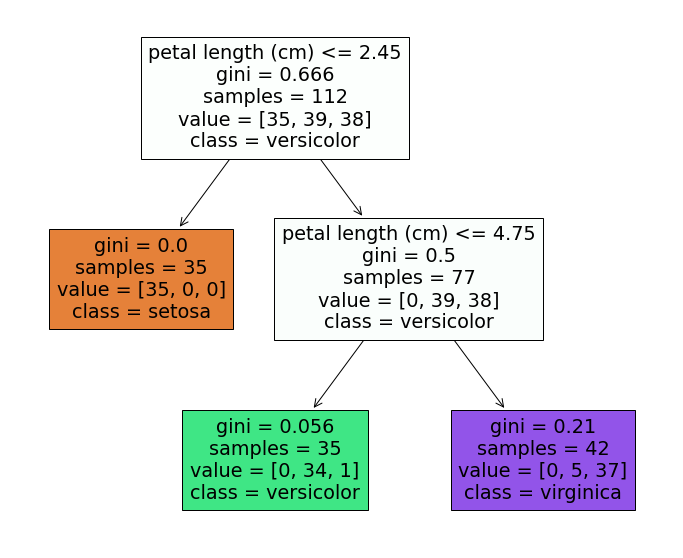

In [ ]:
plt.figure(figsize=(12,10))
_ = tree.plot_tree(clf, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True)

### Посмотрим как выглядит разделяющая плоскость

#### Создадим легко разделимый датасет

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42, cluster_std=3)

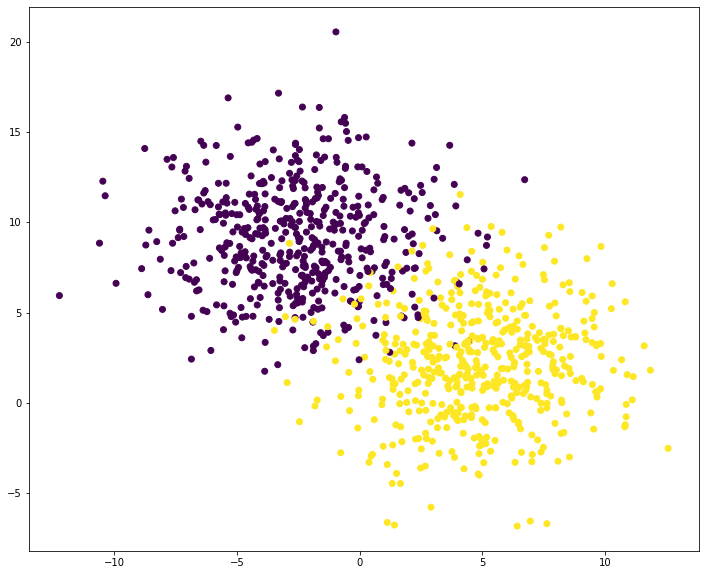

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1], c=y)

#### Построим классификатор – как обычно, делим на трейн и тест, учим, считаем метрики

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

##### Считаем метрики -- accuracy и accuracy на кросс-валидации

In [ ]:
clf.score(X_test, y_test)

0.932

In [ ]:
metrics.accuracy_score(y_test, y_pred)


0.932

In [ ]:
cross_val_score(clf, X, y, cv=5)

array([0.91 , 0.94 , 0.915, 0.935, 0.935])

In [ ]:
np.mean(cross_val_score(clf, X, y, cv=5))

0.9269999999999999

#### Посмотрим на разделяющую плоскость

In [ ]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize = (16, 6))
    light_colors = ListedColormap(['lightyellow','lightcoral'])
    colors = ListedColormap(['yellow', 'red'])
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=40, cmap=colors)
    plt.title('Train data, accuracy={}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=40, cmap=colors)
    plt.title('Test data, accuracy={}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

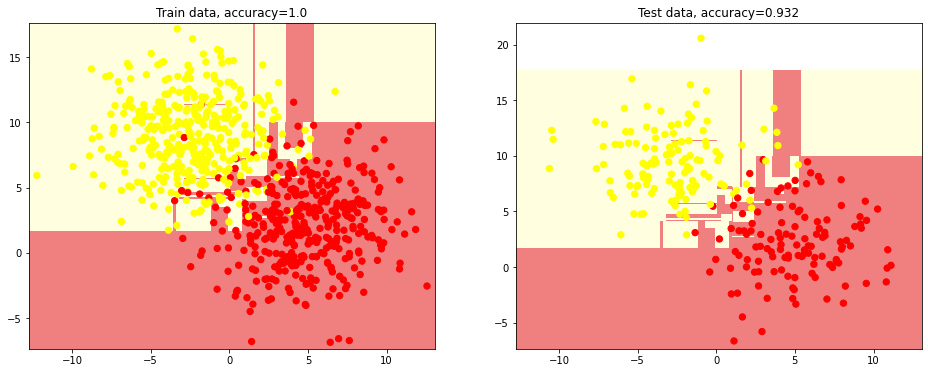

In [ ]:
plot_decision_surface(clf, X_train, y_train, X_test, y_test)

#### Посмотрим на менее удачный датасет

In [ ]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.3, random_state=42)

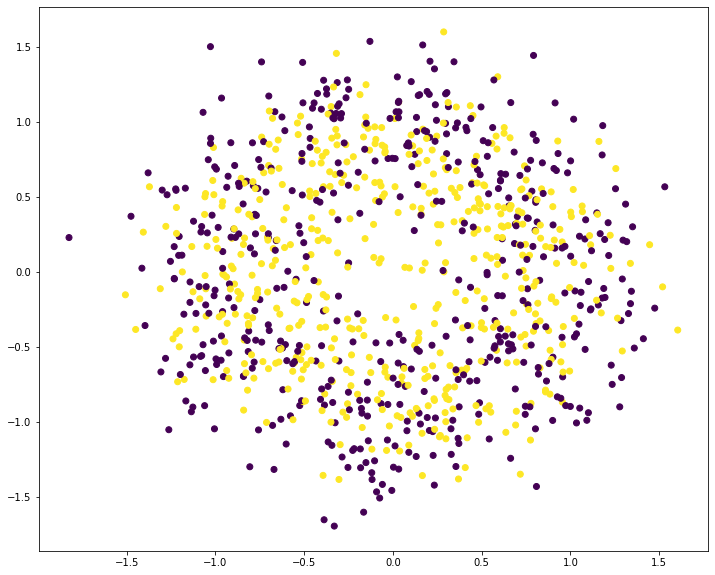

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles)

In [ ]:
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, random_state=42)

In [ ]:
clf_circles = DecisionTreeClassifier(random_state=42)
clf_circles.fit(X_train_circles, y_train_circles)
predict = clf_circles.predict(X_test_circles)
print(f"Accuracy: {clf_circles.score(X_test_circles, y_test_circles)}")
print(f"Accuracy on CV: {np.mean(cross_val_score(clf_circles, X_circles, y_circles, cv=5))}")

Accuracy: 0.504
Accuracy on CV: 0.5409999999999999


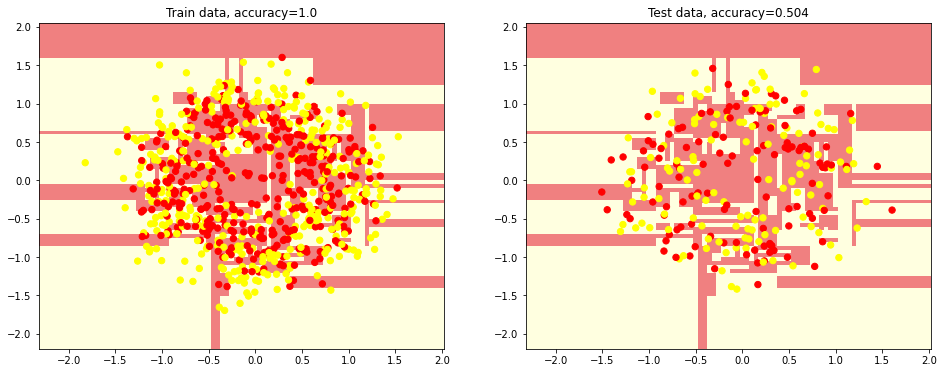

In [ ]:
plot_decision_surface(clf_circles, X_train_circles, y_train_circles, X_test_circles, y_test_circles)

In [ ]:
clf_circles = RandomForestClassifier(n_estimators=500, random_state=42)
clf_circles.fit(X_train_circles, y_train_circles)
predict = clf_circles.predict(X_test_circles)
print(f"Accuracy: {clf_circles.score(X_test_circles, y_test_circles)}")
print(f"Accuracy on CV: {np.mean(cross_val_score(clf_circles, X_circles, y_circles, cv=5))}")

Accuracy: 0.516
Accuracy on CV: 0.541


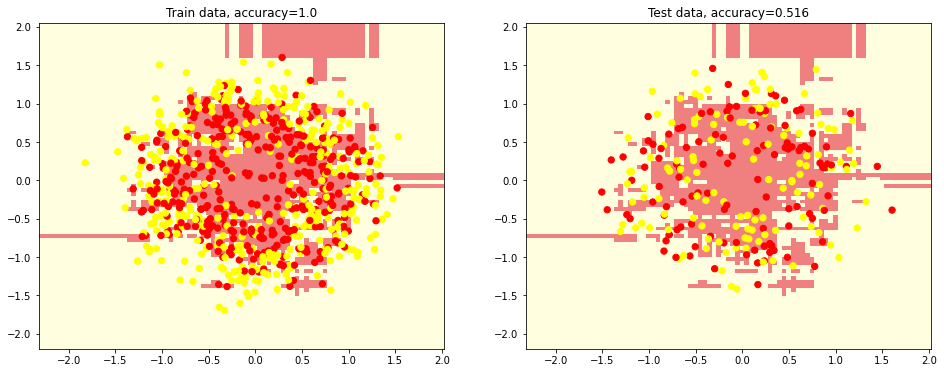

In [ ]:
plot_decision_surface(clf_circles, X_train_circles, y_train_circles, X_test_circles, y_test_circles)

### Давайте посмотрим, какие параметры решающего дерева можно менять

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

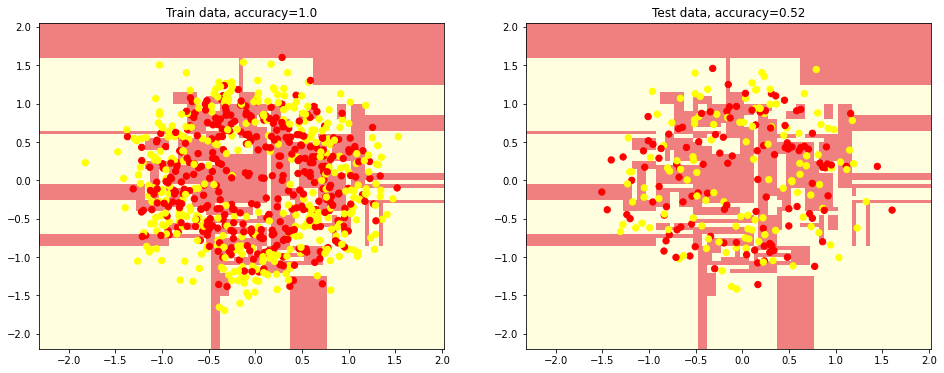

In [ ]:
plot_decision_surface(DecisionTreeClassifier(max_depth=200), X_train_circles, y_train_circles, X_test_circles, y_test_circles)

#### Самостоятельная работа
Изучите зависимость качества работы алгоритма на тесте при изменении параметров

1.   max_depth
2.   min_samples_leaf

Нарисуйте график

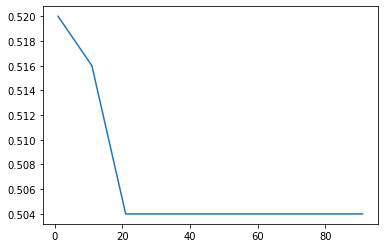

In [ ]:
# Todo: изучить качество работы алгоритма при изменении max_depth
accuracies = []

for depth in range(1, 101, 10):
  clf_circles = DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf_circles.fit(X_train_circles, y_train_circles)
  accuracies.append(clf_circles.score(X_test_circles, y_test_circles))

plt.plot(list(range(1, 101, 10)), accuracies)

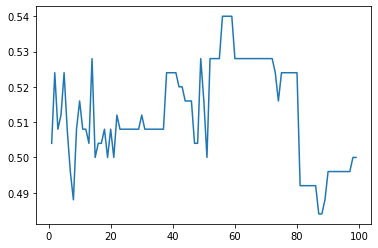

In [ ]:
# Todo: изучить качество работы алгоритма при изменении min_samples_leaf
### Ваш код здесь
accuracies = []

for min_samples_leaf in range(1, 100, 1):
  clf_circles = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
  clf_circles.fit(X_train_circles, y_train_circles)
  accuracies.append(clf_circles.score(X_test_circles, y_test_circles))

plt.plot(list(range(1, 100, 1)), accuracies)

### Посмотрим на качество на обучении и кросс-валидации

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
def draw_accuracy_graph(alg, param, grid_list, X, y):
    # Инициализируем валидацию
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    train_acc = []
    test_acc = []
    temp_train_acc = []
    temp_test_acc = []
    trees_grid = grid_list
    
    # Обучаем на тренировочном датасете
    for ntrees in trees_grid:
        _kwargs = {param:ntrees}
        rfc = alg(**_kwargs)
        temp_train_acc = []
        temp_test_acc = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            rfc.fit(X_train, y_train)
            temp_train_acc.append(rfc.score(X_train, y_train))
            temp_test_acc.append(rfc.score(X_test, y_test))
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)

    train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
    print("Best accuracy on CV is {:.2f}% with {} {}".format(max(test_acc.mean(axis=1))*100, 
                                                            trees_grid[np.argmax(test_acc.mean(axis=1))],
                                                            param))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
    ax.legend(loc='best')
    ax.set_ylabel("Accuracy")
    ax.set_xlabel(param)

Best accuracy on CV is 56.90% with 11 max_depth


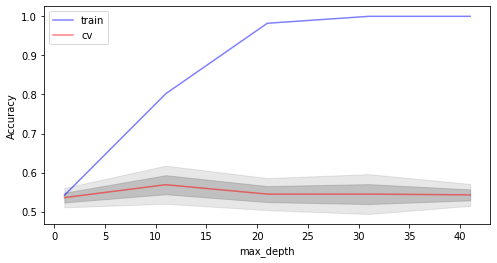

In [ ]:
draw_accuracy_graph(DecisionTreeClassifier,'max_depth', list(range(1, 51, 10)), X_circles, y_circles)

Best accuracy on CV is 59.60% with 62 min_samples_leaf


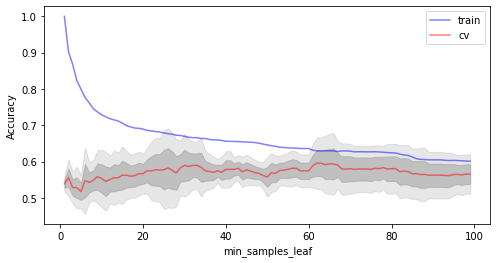

In [ ]:
draw_accuracy_graph(DecisionTreeClassifier,'min_samples_leaf', list(range(1, 100)), X_circles, y_circles)

# Случайный лес

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data / https://drive.google.com/file/d/1ynddxhNnhmGgZVqdy0M4zTuD8r3C4cBP/view?usp=sharing

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

### Посмотрим на данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bioresponse = pd.read_csv('/content/drive/My Drive/tinkoff/train.csv', header=0, sep=',')

In [ ]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bioresponse.shape

(3751, 1777)

In [ ]:
bioresponse.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [ ]:
bioresponse_target = bioresponse.Activity.values
bioresponse_data = bioresponse.iloc[:, 1:]

In [ ]:
Counter(bioresponse_target)

Counter({0: 1717, 1: 2034})

### Обучим RandomForestClassifier

#### Посмотрим на кривые обучения для леса, где деревья небольшой глубины

In [ ]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)

In [ ]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, 
                                               bioresponse_data, 
                                               bioresponse_target,
                                               train_sizes=np.arange(0.1, 1., 0.2), 
                                               cv=3, 
                                               scoring='accuracy')

In [ ]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[0.75733333 0.71422222 0.70746667 0.70761905 0.70148148]
[0.62570445 0.64648505 0.67289166 0.67875108 0.68354682]


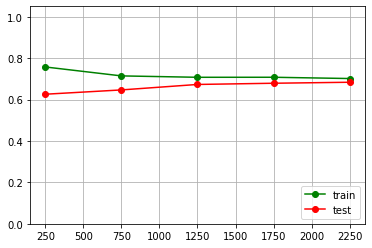

In [ ]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right');

#### Посмотрим на кривые обучения для леса, где деревья глубже

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

In [ ]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, 
                                               bioresponse_data, 
                                               bioresponse_target,
                                               train_sizes=np.arange(0.1, 1., 0.2), 
                                               cv=3, 
                                               scoring='accuracy')

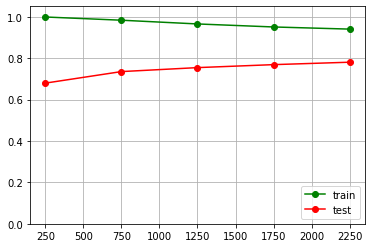

In [ ]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right');

#### Самостоятельная работа: посмотрим на кривые обучения для леса, где деревья неглубокие, но их много

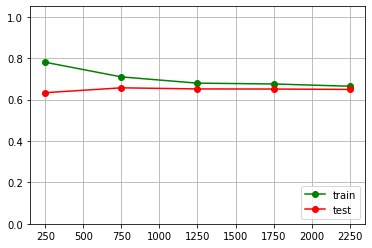

In [ ]:
### Ваш код здесь 
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, 
                                               bioresponse_data, 
                                               bioresponse_target,
                                               train_sizes=np.arange(0.1, 1., 0.2), 
                                               cv=3, 
                                               scoring='accuracy')
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right');

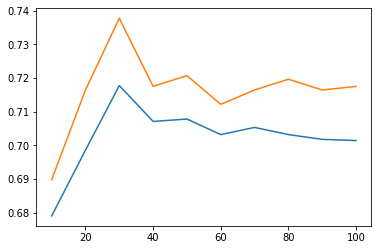

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bioresponse_data, bioresponse_target, random_state=42)

metrics_train = []
metrics_test = []
for i in range(10, 101, 10):
  clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=42)
  clf.fit(X_train, y_train)
  metrics_train.append(clf.score(X_train, y_train))
  metrics_test.append(clf.score(X_test, y_test))

plt.plot(list(range(10, 101, 10)), metrics_train)
plt.plot(list(range(10, 101, 10)), metrics_test)

# Ансамбли – делаем случайный лес сами

## Посмотрим на данные

Возьмем известный нам датасет с цифрами

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

## Самостоятельная работа

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. 

Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

### Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. 

In [ ]:
### Ваш код здесь
clf = DecisionTreeClassifier(random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.8335909373060211

### Воспользуйтесь sklearn.ensemble BaggingClassifier и обучите его над DecisionTreeClassifier. 

Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [ ]:
### Ваш код здесь
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9220515207945376

#### Используйте только $\sqrt{d}$ признаков

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на  $\sqrt{d}$случайных признаков. 

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [ ]:
### Ваш код здесь
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
np.mean(cross_val_score(clf, X, y, cv=10))

0.9276536312849164

#### Попробуйте выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева

Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. 

In [ ]:
### Ваш код здесь
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_features=int(np.sqrt(X.shape[1]))),
                        n_estimators=100)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9499037864680322

In [ ]:
### Ваш код здесь
clf = RandomForestClassifier(random_state=42)
np.mean(cross_val_score(clf, X, y, cv=10))

0.9493544382371197